Estimated Q-values for each arm: [ 1.52 -1.44  0.35 -0.67  0.8   0.05  0.5  -2.15 -0.91  0.05]
Number of times each arm was selected: [446, 7, 5, 7, 6, 4, 7, 5, 7, 6]
Average reward over all episodes: 1.317


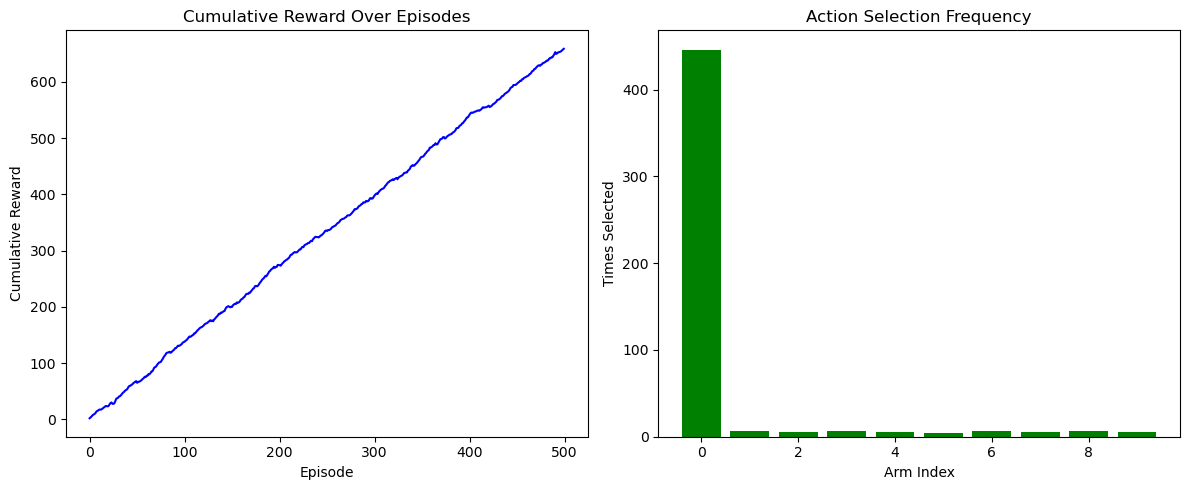

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Multi-Armed Bandit Environment
class MultiArmedBandit:
    def __init__(self, k=10):
        self.k = k
        self.q_true = np.random.normal(0, 1, k)  # true action values

    def step(self, action):
        # Reward sampled from normal distribution around q_true
        reward = np.random.normal(self.q_true[action], 1)
        return reward


# Epsilon-Greedy Agent
class EGreedyAgent:
    def __init__(self, n_arms, epsilon=0.1):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.counts = np.zeros(n_arms, dtype=int)
        self.values = np.zeros(n_arms, dtype=float)

    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)  # explore
        else:
            return np.argmax(self.values)  # exploit

    def update(self, arm, reward):
        self.counts[arm] += 1
        self.values[arm] += (reward - self.values[arm]) / self.counts[arm]


# Run experiment
def run_bandit_experiment(k=10, steps=500, epsilon=0.1):
    env = MultiArmedBandit(k)
    agent = EGreedyAgent(k, epsilon)

    rewards = []
    cumulative_rewards = []
    total_reward = 0

    for t in range(steps):
        action = agent.select_action()
        reward = env.step(action)
        agent.update(action, reward)

        total_reward += reward
        rewards.append(reward)
        cumulative_rewards.append(total_reward)

    # Final Results
    print("Estimated Q-values for each arm:", np.round(agent.values, 2))
    print("Number of times each arm was selected:", agent.counts.tolist())
    print("Average reward over all episodes:", round(np.mean(rewards), 3))

    # Plot results
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Cumulative Reward Plot
    axes[0].plot(range(steps), cumulative_rewards, color="blue")
    axes[0].set_title("Cumulative Reward Over Episodes")
    axes[0].set_xlabel("Episode")
    axes[0].set_ylabel("Cumulative Reward")

    # Action Selection Frequency Plot
    axes[1].bar(range(k), agent.counts, color="green")
    axes[1].set_title("Action Selection Frequency")
    axes[1].set_xlabel("Arm Index")
    axes[1].set_ylabel("Times Selected")

    plt.tight_layout()
    plt.show()


# Main execution
if __name__ == "__main__":
    run_bandit_experiment(k=10, steps=500, epsilon=0.1)
